In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage import io
from hilbert_flatten import hilbert_flatten as flatten, hilbert_expand as expand

import sys
sys.path.append('../conv_pool')

from conv import *
from img_utils import *

[0.71144196 0.7069549  0.71087647 ... 0.36552627 0.34591843 0.4870949 ]


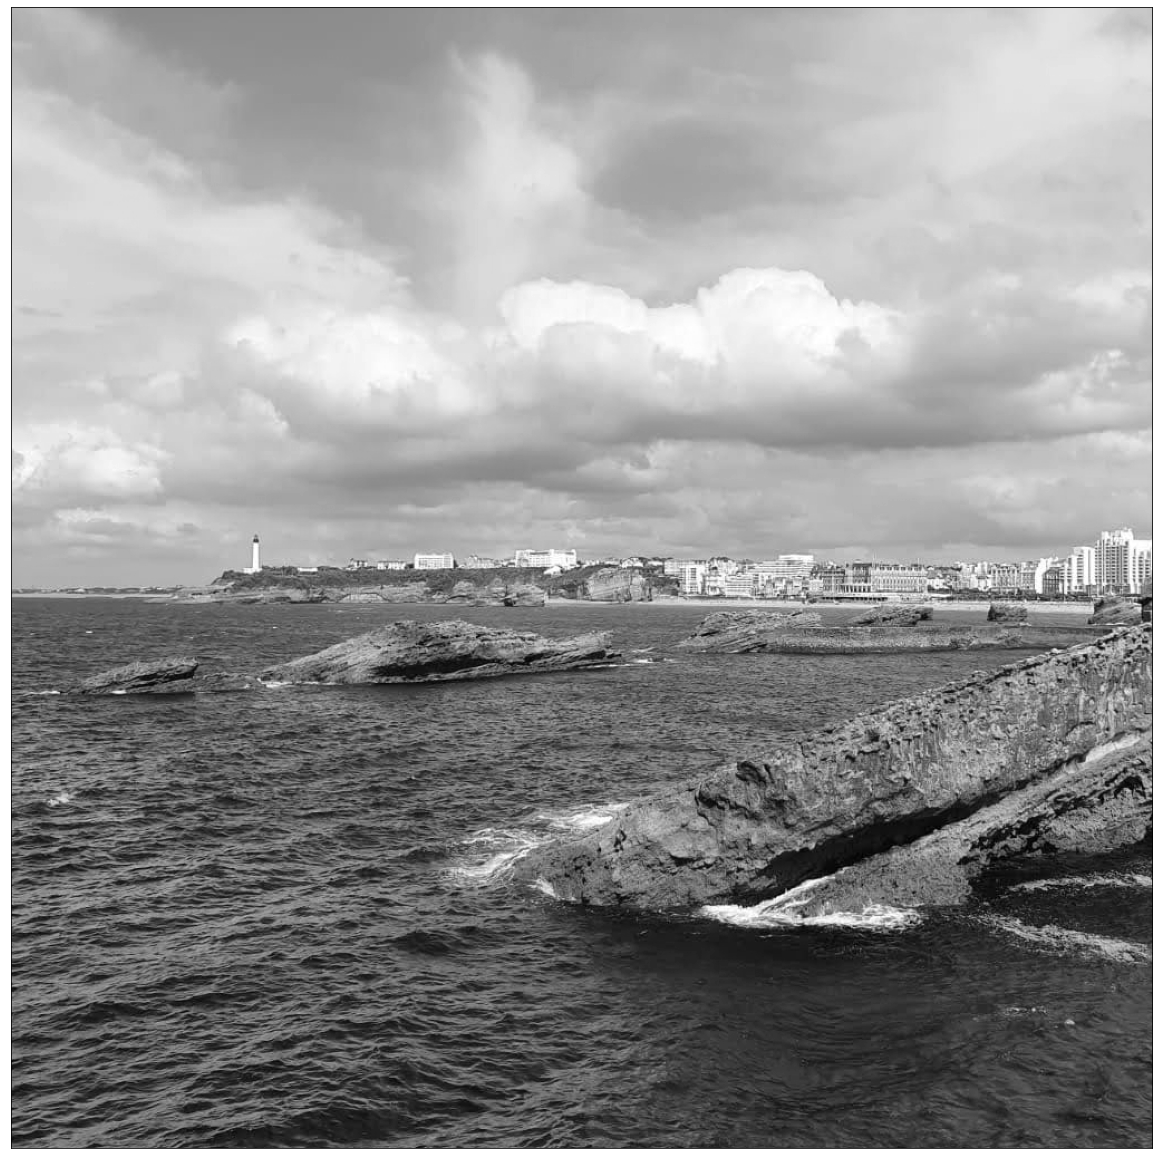

(1024, 1024)


In [8]:
# size is 1024*1024 pixels
img = read_im('./data/biarritz1024.jpg')
# flatten the image with hilbert curve
flat = flatten(img, 16)
print(flat)
plt_im(img)  # expand(flat, 2))
print(img.shape)

In [9]:
# pool 1d , so that the output size is not 1024*1024 but 256*256 
print(out_size(1024**2, 16, 0, 16))
# this is the perfect output size

65536


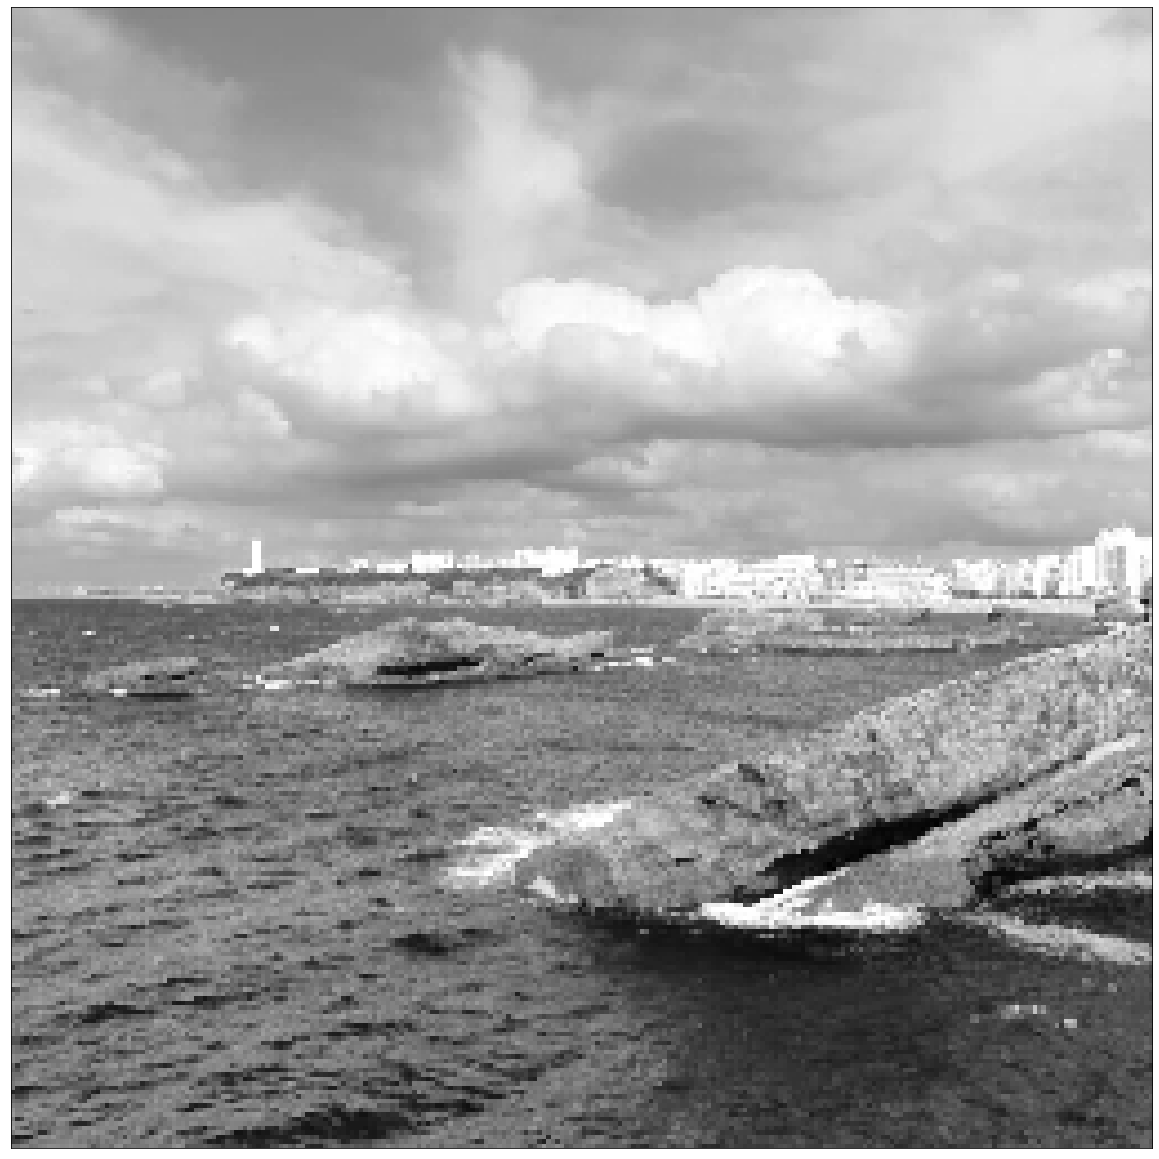

In [10]:
pooled = pool1(flat, 
               k=16, 
               s=16, 
               action=np.max)

plt_im(expand(pooled, 2, 16))

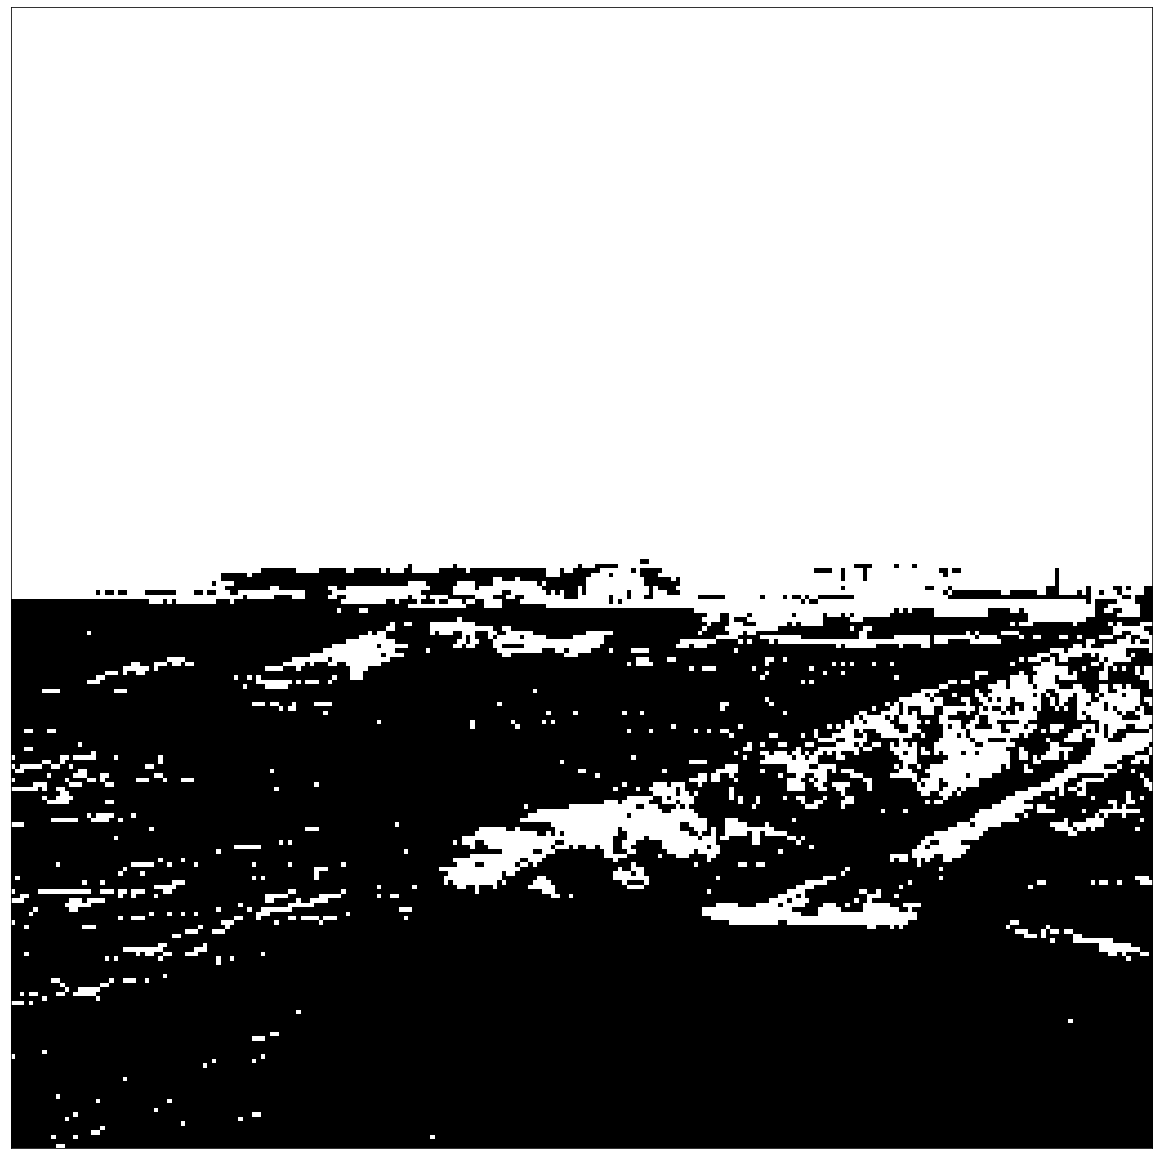

In [11]:
pooled2 = pool1(flat, 
               k=16, 
               s=16, 
               action=lambda x: np.sign(np.average(x) - .5))

plt_im(expand(pooled2, 2, 16))

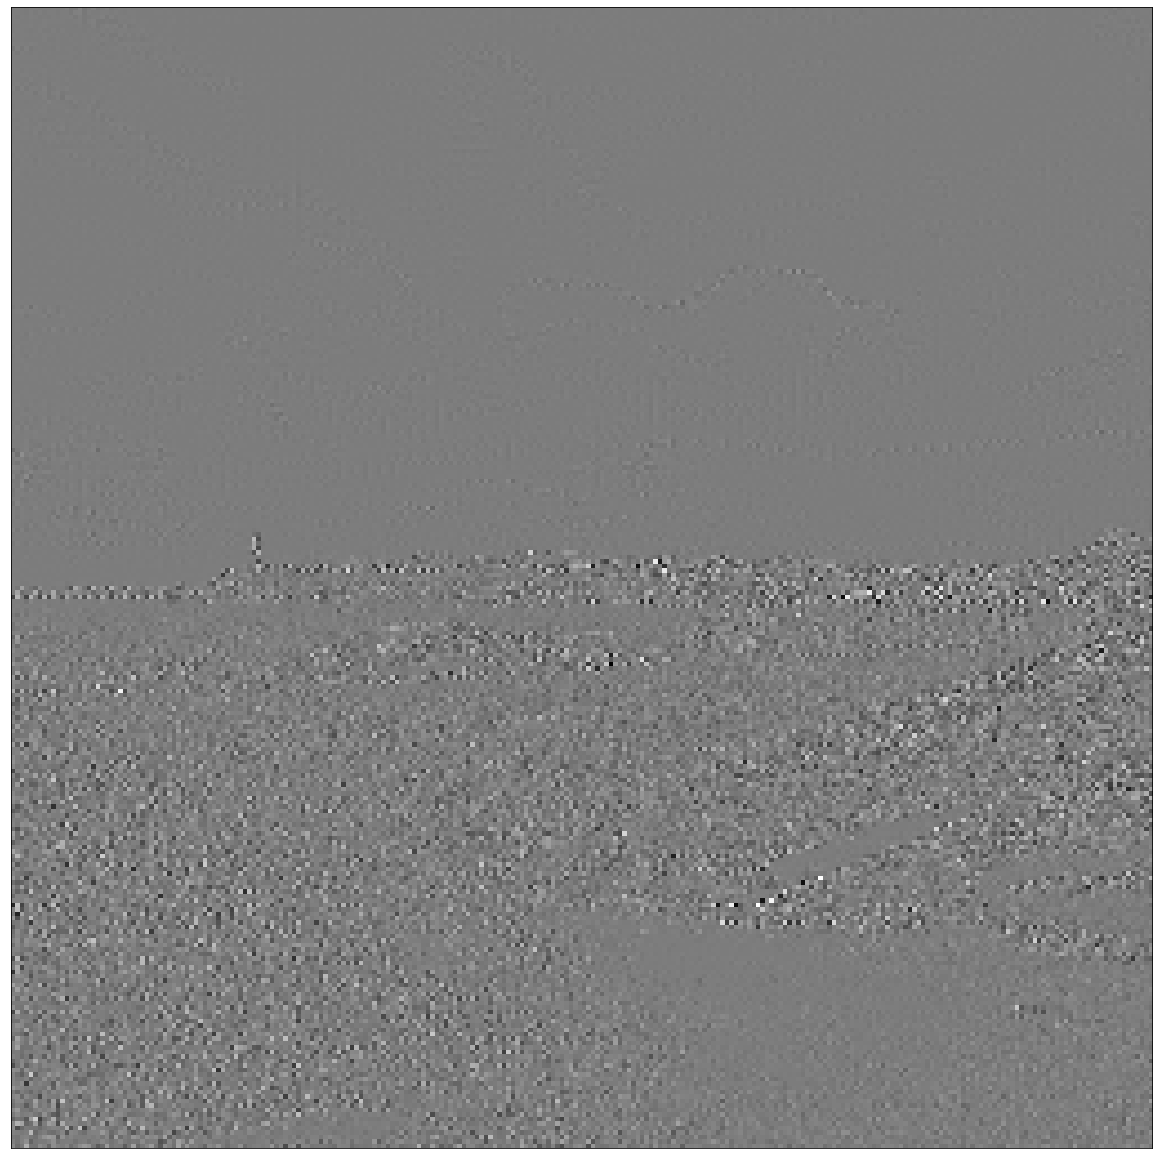

In [12]:
# the problem now is, 1d conv != 2d conv; i cannot intuitively think of a way to recreate the filters for for example horizontal line mapping etc.
# of couse this is still possible (is it?)
# but in the end, BACKPROPAGATION would solve this problem for us (?)
# BIG disadvantage of this method: we have to keep scaling big time to keep in ratio 4^n (?)
# in the end I have to test this out a lot more, since this is a completely different way of putting together the image afterwards after filtering
conved = conv1(flat, 
               F=[-1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], 
               p=0,
               s=16)

plt_im(expand(conved, 2, 16))

In [7]:
# at least this approach speeds up k-nearest-neighbours